In [35]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import seaborn as sns
from sklearn.decomposition import PCA
from ast import literal_eval
from collections import Counter
import gower

In [36]:
user_profile = pd.read_csv("data/user_profile/prepared/User_Profile_Null_Handled.csv")

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning:

Columns (11,14,18,23,25,28,29,59,60,62,64,66,68,70,72,74,76,77) have mixed types. Specify dtype option on import or set low_memory=False.



In [37]:
user_profile.drop(["Unnamed: 0"],axis=1, inplace=True)

## Scaling Categorical Features

In [39]:
data = user_profile.iloc[:,[2,4,5,6,7,8,10,13,15,17,19,20,22,24,25,26,28,33,35,36,38,39,40,42,44,45,46,48,49,50,52,53,54,56,57,59,60,63,67,69,72,73,80,81,84,85,86,87,101,102,103,104,105,106,107,108,109,110,111]]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36877 entries, 0 to 36876
Data columns (total 59 columns):
Voice_INCOMING_Scaled                   36877 non-null float64
Location_Identifier                     36877 non-null object
Location_Node                           36877 non-null object
Package_Type_and_Medium                 36877 non-null object
Model                                   36877 non-null object
Service_Status                          36877 non-null object
Voice_OUTGOING_Scaled                   36877 non-null object
IDD_INCOMING_Scaled                     36877 non-null object
IDD_incoming_country                    36877 non-null object
IDD_OUTGOING_Scaled                     36877 non-null object
IDD_outgoing_country                    36877 non-null object
Peo_TV_Package                          36877 non-null object
PEO_TV_Scaled                           36877 non-null object
BB_Scaled                               36877 non-null object
BB_Package            

In [40]:
data["Sub_Type"].value_counts()

DOUBLE_PLAY_BV    13760
TRIPLE_PLAY       13733
SINGLE_PLAY        6037
DOUBLE_PLAY_PV     3281
4G                   65
0.0                   1
Name: Sub_Type, dtype: int64

In [41]:
data.describe()

Voice_INCOMING_Scaled  Bill_Outstanding_Balance  \
count           36877.000000              3.687700e+04   
mean                0.115562              4.824208e+06   
std                 0.097189              5.324248e+07   
min                 0.001736             -1.088017e+08   
25%                 0.031746              1.819430e+06   
50%                 0.092510              3.254340e+06   
75%                 0.178571              5.613250e+06   
max                 0.944444              9.948746e+09   

       Peo_Packages_if_Senior_Citizen  Peo_Packages_if_Kids  \
count                    36876.000000           36876.00000   
mean                         0.001106               0.00147   
std                          0.014907               0.01801   
min                          0.000000               0.00000   
25%                          0.000000               0.00000   
50%                          0.000000               0.00000   
75%                          0.000000               0.00000   
max                          0.400000               0.40000   

       Peo_Packages_if_Teenager_Students  \
count                       36876.000000   
mean                            0.005500   
std                             0.032904   
min                             0.000000   
25%                             0.000000   
50%                             0.000000   
75%                             0.000000   
max                             0.400000   

       Peo_Package_if_Working_Professionals  \
count                          36876.000000   
mean                               0.010375   
std                                0.053976   
min                                0.000000   
25%                                0.000000   
50%                                0.000000   
75%                                0.000000   
max                                0.600000   

       BB_Package_if_Working_Professionals  BB_Packages_if_Teenager_Students  \
count                              36876.0                           36876.0   
mean                                   0.0                               0.0   
std                                    0.0                               0.0   
min                                    0.0                               0.0   
25%                                    0.0                               0.0   
50%                                    0.0                               0.0   
75%                                    0.0                               0.0   
max                                    0.0                               0.0   

       BB_Packages_if_SMEss   VAS_if_Kids  VAS_if_Teenager_Students  \
count               36876.0  36876.000000              36876.000000   
mean                    0.0      0.005410                  0.089690   
std                     0.0      0.051728                  0.167476   
min                     0.0      0.000000                  0.000000   
25%                     0.0      0.000000                  0.000000   
50%                     0.0      0.000000                  0.000000   
75%                     0.0      0.000000                  0.200000   
max                     0.0      0.500000                  1.000000   

       VAS_if_Working_Professionals  
count                  36876.000000  
mean                       0.126938  
std                        0.171412  
min                        0.000000  
25%                        0.000000  
50%                        0.000000  
75%                        0.200000  
max                        0.700000

### Correlations

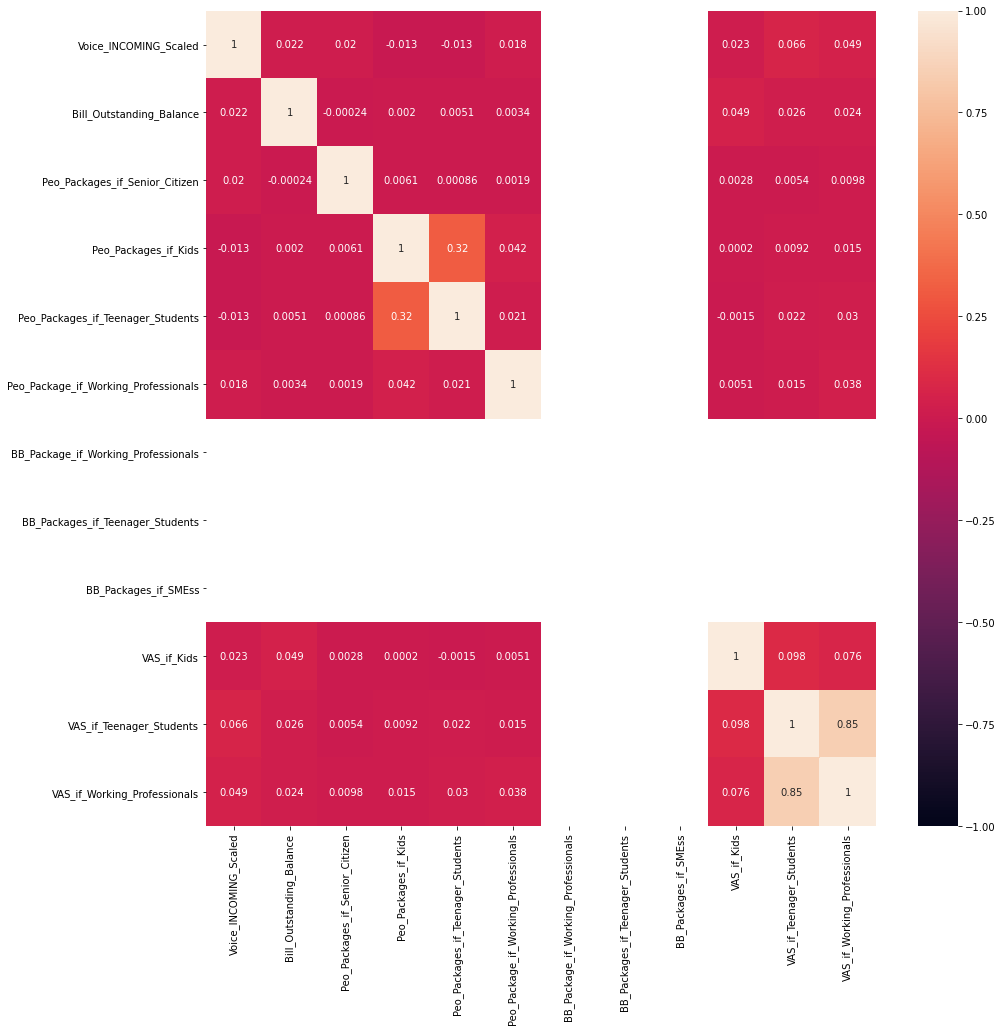

In [42]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1)
plt.show()

## Measuring Distances of Categorical Variables with Gower 

In [44]:
mp = []

for col in data.dtypes:
    if col == "float64":
        mp.append(False)
    else:
        mp.append(True)

In [45]:
len(mp)

59

In [46]:
dm = gower.gower_matrix(data, cat_features = mp )

## Feature Selection

- Feature selector that removes all low-variance features.
- This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.
- docs: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html

# Applying PCA

### Find most approporiate no of components

In [49]:
pc=PCA(n_components=35) 
pc.fit(dm)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
#How much variance,caputured individually
pc.explained_variance_

In [ ]:
#How mucb variance, captured together
cumsum_arr = pc.explained_variance_ratio_.cumsum() 

In [ ]:
cumsum_arr

In [ ]:
pca_df = pd.DataFrame(data.columns.tolist(),columns=["Feature"])

In [ ]:
pca_df["Importance"] = cumsum_arr

In [ ]:
pca_df

In [ ]:
sns.lineplot(range(1,1+pc.explained_variance_.shape[0]),pc.explained_variance_)
plt.show()

In [50]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
pca_2d = PCA(n_components=2)
pca_2d.fit(dm)
reduced_data = pca_2d.fit_transform(dm)
results_2d_df = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

# applying min-max-scaler to reduced features
scaler = MinMaxScaler()
results_2d_df[['pca1','pca2']] = scaler.fit_transform(results_2d_df[['pca1','pca2']])

results = results_2d_df.values

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [51]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
pca_3d = PCA(n_components=3)
pca_3d.fit(dm)
reduced_data = pca_3d.fit_transform(dm)
results_3d_df = pd.DataFrame(reduced_data,columns=['pca1','pca2','pca3'])

# applying min-max-scaler to reduced features
scaler = MinMaxScaler()
results_3d_df[['pca1','pca2','pca3']] = scaler.fit_transform(results_3d_df[['pca1','pca2','pca3']])

results_3d = results_3d_df.values

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

# Clustering

## Hierarchical f Clusters and Dendrogram
- Hierarchical Clustering

## Ward Linkage

In [ ]:
result = linkage(dm, method="ward") 

In [ ]:
plt.figure(figsize=(20,20))
shc.dendrogram(result)
plt.show()

## Avarage Linkage

<ipython-input-116-01c5b7495027>:1: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



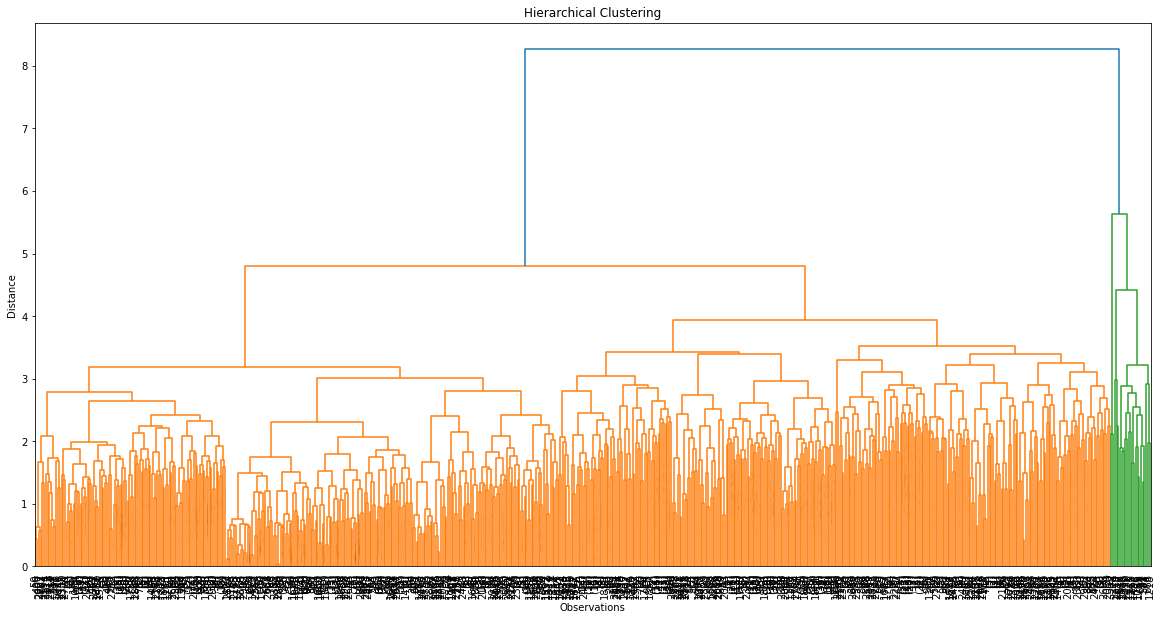

In [116]:
hc_average = linkage(dm, "average")

plt.figure(figsize=(20, 10))
plt.title("Hierarchical Clustering")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average,
           leaf_font_size=10, 
           p=10,
           show_contracted=True,
          truncate_mode='level')
plt.show()

## Complete Linkage

<ipython-input-117-cd4585891250>:2: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



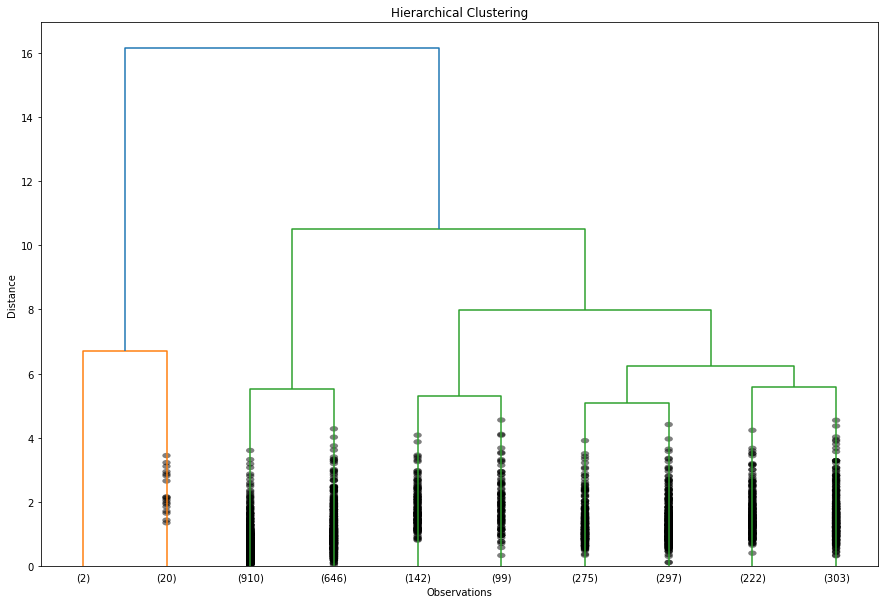

In [117]:
# Complete Linkage Method
hc_complete = linkage(dm, "complete")

plt.figure(figsize=(15, 10))
plt.title("Hierarchical Clustering")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.show()

## F clusters

In [47]:
ag_y_clusters = fcluster(result, 4, criterion='maxclust')
ag_y_clusters

NameError: name 'result' is not defined

In [ ]:
cluster_labels=["x",0,1,2,3]
val_dict = dict(zip(cluster_labels,np.bincount(ag_y_clusters)))
val_dict.pop("x")
val_dict

In [156]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Pca 1'),yaxis = dict(title  = 'Pca 2'),zaxis = dict(title  = 'Pca 3'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = ag_y_clusters
trace = go.Scatter3d(x=results_3d[:, 0], y=results_3d[:, 1], z=results_3d[:, 2], mode='markers',marker=dict(color = labels, size= 5, line=dict(color= 'black',width =1)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

# Agglomerative Clustering - 4 Clusters (ward)

In [148]:
acl=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="ward")

In [149]:
acl.fit(dm)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



AgglomerativeClustering(n_clusters=4)

In [150]:
# cluster labels
acl_y_clusters = acl.labels_

In [151]:
acl_y_clusters

array([3, 3, 0, ..., 0, 1, 1], dtype=int64)

In [152]:
cluster_labels=[0,1,2,3]
dict(zip(cluster_labels,np.bincount(acl_y_clusters)))

{0: 822, 1: 780, 2: 609, 3: 705}

In [153]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Pca 1'),yaxis = dict(title  = 'Pca 2'),zaxis = dict(title  = 'Pca 3'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = acl_y_clusters
trace = go.Scatter3d(x=results_3d[:, 0], y=results_3d[:, 1], z=results_3d[:, 2], mode='markers',marker=dict(color = labels, size= 5, line=dict(color= 'black',width =1)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

# K-Means Clustering

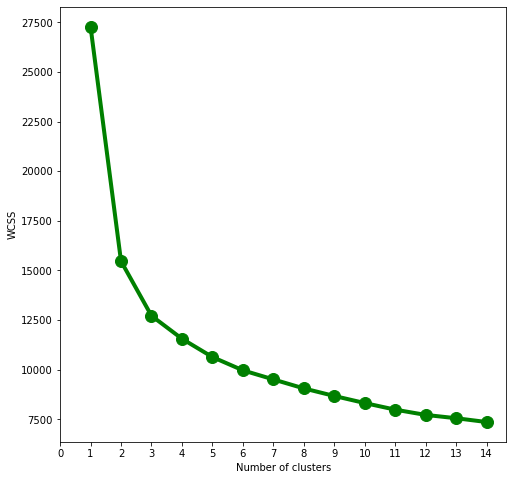

In [133]:
# find the optimal number of clusters using elbow method
WCSS = []
for i in range(1,15):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(dm)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (8,8))
plt.plot(range(1,15),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(15))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [134]:
# since elbow occured at 3, let's consider 3 clusters
km_model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
kmeans_y_clusters = km_model.fit_predict(dm)

In [135]:
kmeans_y_clusters

array([0, 0, 2, ..., 2, 0, 0])

In [136]:
km_model.labels_

array([0, 0, 2, ..., 2, 0, 0])

In [137]:
cluster_labels=[0,1,2]
dict(zip(cluster_labels,np.bincount(km_model.labels_)))

{0: 1167, 1: 643, 2: 1106}

In [138]:
km_model.cluster_centers_

array([[0.11935328, 0.15456721, 0.18118806, ..., 0.21401578, 0.1755456 ,
        0.14403036],
       [0.27511698, 0.28778705, 0.31625953, ..., 0.29605377, 0.31336278,
        0.27234796],
       [0.19860359, 0.22999276, 0.24786748, ..., 0.23719275, 0.2551485 ,
        0.2013709 ]], dtype=float32)

# K-Medoids Clustering

In [139]:
#Reference : https://stackoverflow.com/questions/66441887/how-can-i-implement-pam-clustering-algorithm-using-gower-distance-in-sklearn
#https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.cluster.KMedoids.html
kmedoids = KMedoids(n_clusters=3, random_state=0,metric = 'precomputed', method = 'pam', init =  'k-medoids++')

In [140]:
kmod_y_clusters = kmedoids.fit_predict(dm)

In [141]:
kmod_y_clusters

array([1, 0, 0, ..., 2, 0, 0], dtype=int64)

In [142]:
kmedoids.labels_

array([1, 0, 0, ..., 2, 0, 0], dtype=int64)

In [143]:
print(kmedoids.cluster_centers_)

None


In [144]:
cluster_labels=[0,1,2]
dict(zip(cluster_labels,np.bincount(kmedoids.labels_)))

{0: 1231, 1: 931, 2: 754}

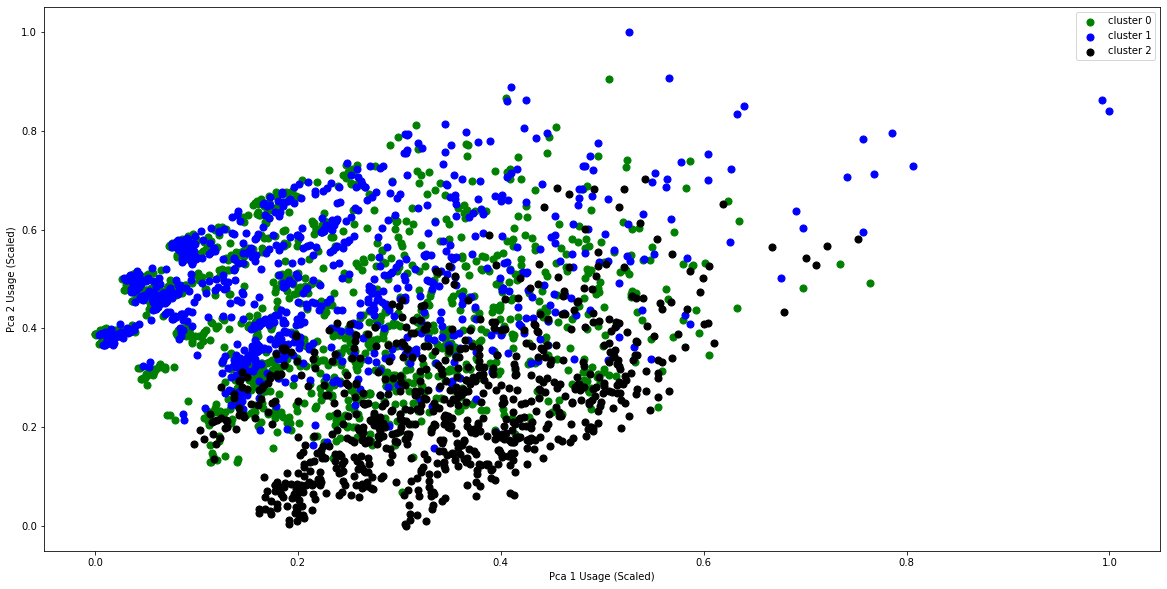

In [145]:
plt.figure(figsize = (20,10))
plt.scatter(results[kmod_y_clusters == 0,0],results[kmod_y_clusters == 0,1],s = 50, c = 'green', label = "cluster 0")
plt.scatter(results[kmod_y_clusters == 1,0],results[kmod_y_clusters == 1,1],s = 50, c = 'blue', label = "cluster 1")
plt.scatter(results[kmod_y_clusters == 2,0],results[kmod_y_clusters == 2,1],s = 50, c = 'black', label = "cluster 2")
#plt.scatter(results[y_clusters == 3,0],results[y_clusters == 3,1],s = 50, c = 'red', label = "cluster 3")
#plt.scatter(kmedoids.cluster_centers_[:,0],kmedoids.cluster_centers_[:,1], s = 100, c = "yellow", label = "centroids")
plt.xlabel("Pca 1 Usage (Scaled)")
plt.ylabel("Pca 2 Usage (Scaled)")
plt.legend()
plt.show()

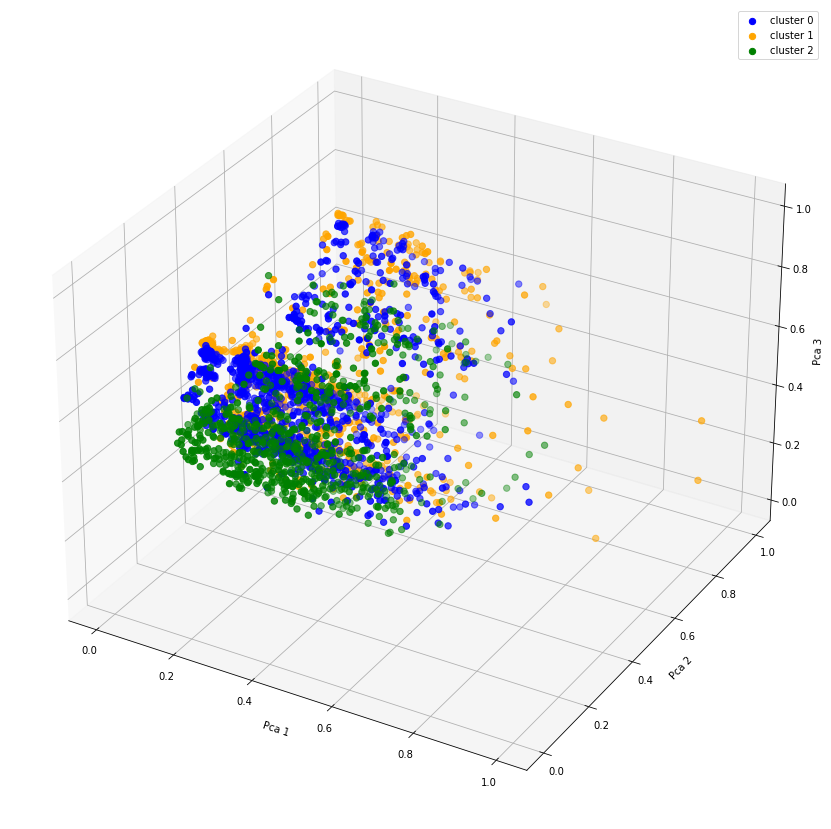

In [146]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(results_3d[kmod_y_clusters == 0,0],results_3d[kmod_y_clusters == 0,1],results_3d[kmod_y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(results_3d[kmod_y_clusters == 1,0],results_3d[kmod_y_clusters == 1,1],results_3d[kmod_y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(results_3d[kmod_y_clusters == 2,0],results_3d[kmod_y_clusters == 2,1],results_3d[kmod_y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
#ax.scatter(results_3d[y_clusters == 3,0],results_3d[y_clusters == 3,1],results_3d[y_clusters == 3,2], s = 40 , color = 'red', label = "cluster 2")
ax.set_xlabel('Pca 1')
ax.set_ylabel('Pca 2')
ax.set_zlabel('Pca 3')
ax.legend()
plt.show()

In [147]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Pca 1'),yaxis = dict(title  = 'Pca 2'),zaxis = dict(title  = 'Pca 3'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = kmedoids.labels_
trace = go.Scatter3d(x=results_3d[:, 0], y=results_3d[:, 1], z=results_3d[:, 2], mode='markers',marker=dict(color = labels, size= 5, line=dict(color= 'black',width =1)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

## Adding clusters column to existing user profile

In [157]:
user_profile["KMOD_3_Cluster"] = kmod_y_clusters

In [158]:
user_profile["H_max_4_Cluster"] = ag_y_clusters

In [159]:
user_profile["H_Agg_4_Cluster"] = acl_y_clusters

In [160]:
user_profile.to_csv("data/user_profile/prepared/User_Profile_Socio_features_with_clusters.csv")